# Anscombe's Quartet

In a 1973 paper, 'Graphs in Statistical Analysis', published in *The American Statistician*, vol. 27, no. 1. (February 1973), pp. 17-21, statistician Francis Anscombe provided the briefest of abstracts: 'Graphs are essential to good statistical analysis.  Ordinary scatterplots and "triple" scatterplots are discussed in relation to regression analysis'

His paper opened with a brief meditation on *the usefulness of graphs*:

> Most textbooks on statistical methods, and most statistical computer programs, pay too little attention to graphs. Few of us escape being indoctrinated with these notions:

> 1. numerical calculations are exact, but graphs are rough; 
> 2. for any particular kind of statistical data there is just one set of calculations constituting a correct statistical analysis; 
> 3. performing intricate calculations is virtuous, whereas actually looking at the data is cheating.

> A computer should make _both_ calculations _and_ graphs. Both sorts of output should be studied; each will contribute to understanding. 

> Graphs can have various purposes, such as: (i) to help us perceive and appreciate some broad features of the data, (ii) to let us look behind those broad features and see what else is there. Most kinds of statistical calculation rest on assumptions about the behavior of the data. Those assumptions may be false, and then the calculations may be misleading. We ought always to try to check whether the assumptions are reasonably correct; and if they are wrong we ought to be able to perceive in what ways they are wrong. Graphs are very valuable for these purposes.

> Good statistical analysis is not a purely routine matter, and generally calls for more than one pass through the computer. The analysis should be sensitive both to peculiar features in the given numbers and also to whatever background information is available about the variables. The latter is particularly helpful in suggesting alternative ways of setting up the analysis. Thought and ingenuity devoted to devising good graphs are likely to pay off. Many ideas can be gleaned from the literature...

To illustrate his call to arms, Anscombe generated a set of four simple pairwise (*x* and *y* values) datasets (known as datasets `I`, `II`, `III`, `IV`) intended to demonstrate the importance and usefulness of actually looking at graphs.

## Let's explore Ancombe's Quartet

In [1]:
import pandas as pd

We can read the data for Anscome's Quartet datasets from a data file into a hierarchically indexed DataFrame.

In [2]:
aq_df = pd.read_csv('data/AnscombesDataSets/anscombesQuartet_hier.csv',
                  header=[0,1], index_col=[0])
aq_df

group     I           II         III           IV       
var       x      y     x     y     x      y     x      y
0      10.0   8.04  10.0  9.14  10.0   7.46   8.0   6.58
1       8.0   6.95   8.0  8.14   8.0   6.77   8.0   5.76
2      13.0   7.58  13.0  8.74  13.0  12.74   8.0   7.71
3       9.0   8.81   9.0  8.77   9.0   7.11   8.0   8.84
4      11.0   8.33  11.0  9.26  11.0   7.81   8.0   8.47
5      14.0   9.96  14.0  8.10  14.0   8.84   8.0   7.04
6       6.0   7.24   6.0  6.13   6.0   6.08   8.0   5.25
7       4.0   4.26   4.0  3.10   4.0   5.39  19.0  12.50
8      12.0  10.84  12.0  9.13  12.0   8.15   8.0   5.56
9       7.0   4.82   7.0  7.26   7.0   6.42   8.0   7.91
10      5.0   5.68   5.0  4.74   5.0   5.73   8.0   6.89

## Examining Anscombe's Quartet with statistical tools
Let's do what Anscombe argues we shouldn't do: let's simply use the statistics to speak about the datasets.

The usual summary statistical properties, the mean and standard deviation (variance), of datasets I to IV hardly vary. 

In [3]:
aq_df.mean()

group  var
I      x      9.0000000
       y      7.5009091
II     x      9.0000000
       y      7.5009091
III    x      9.0000000
       y      7.5000000
IV     x      9.0000000
       y      7.5009091
dtype: float64

In [4]:
aq_df.var()

group  var
I      x      11.0000000
       y       4.1272691
II     x      11.0000000
       y       4.1276291
III    x      11.0000000
       y       4.1226200
IV     x      11.0000000
       y       4.1232491
dtype: float64

The average (mean) values are almost identical for *x* and *y* across the groups and the variances within each group are indistinguishable down to fine tolerance.

Other statistical properties, including some statistical visualisations such as regression lines, were also the same.

I'll use the *seaborn* package to plot the linear regression lines for each of the four datasets.

In this visualisation we're _not_ looking at the dataset itself; we're looking at the result (the output) of a linear regression statistical analysis applied to the dataset.

Note: seaborn is a package specifically intended to support statistical data visualisation.  

Sadly the seaborn library is giving a deprecated warning each time it is used.  It looks like we froze our Virtual Machine after one the packages seaborn makes use of was changed, but before the seaborn distribution caught up.  

In [5]:
import seaborn as sns

sns.set(style="ticks")
# Load the example dataset for Anscombe's Quartet from the seaborn package;
#   the DataFrame that results has a different shape than the hierarchical 
#   DataFrame we read in earlier. 
# This is a long thin DataFrame in which the column 'dataset' contains a value marker to 
#   show which dataset each row belongs to.  The values in each dataset are identical to those 
#   we used earlier.
anscombe_df = sns.load_dataset('anscombe')
anscombe_df.head(15)

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


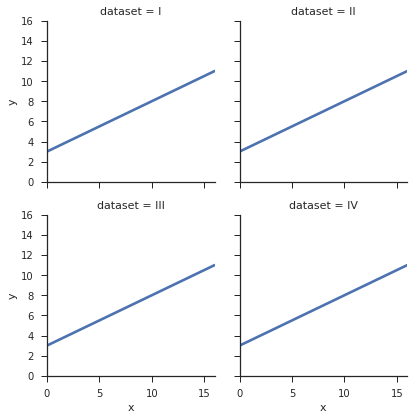

In [6]:
# seaborn uses a FacetGrid class to create multiple charts in one figure. 
#  We can use the column 'dataset' values to determine the different x,y values for each plot.
#  All the x and y values lie between 0 and 16, so we can use those for the plot limits.
# The following sets up the FaceGrid over the anscome_df DataFrame.
fourplots = sns.FacetGrid(anscombe_df, 
                          col='dataset', 
                          col_wrap=2, 
                          xlim=(0,16), ylim=(0,16))

# And then we can map (chart) these using the regression line plot 
#  (for now we don't want the underlying data points plotted, so we set scatter to False,
#   and we don't want to show the confidence interval for the regression line.)
fourplots.map(sns.regplot, 'x', 'y', scatter=False, ci=None)

So from these summary statistics - _mean_, _variance_ and _linear regression_ - we could be led to conclude that the datasets are, to all intents and purposes, the same (or at least, very similar).

But, we've another statistical tool that we can add to the regression line - we can show the confidence interval, an indication of how well the regression line fits the data.  Let's plot the 95% confidence interval on our regression lines (`ci=95` in the code below).

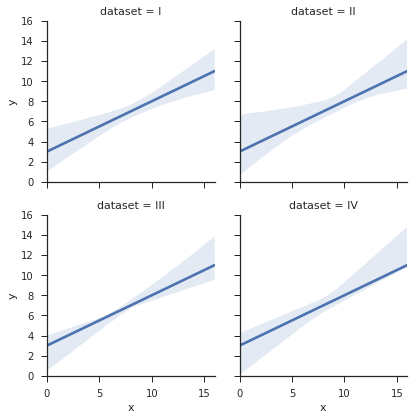

In [7]:
# Show the results of a linear regression within each dataset, 
# with the 95% confidence interval overlayed.
fourplots = sns.FacetGrid(anscombe_df, 
                          col='dataset', 
                          col_wrap=2, 
                          xlim=(0,16), ylim=(0,16))

fourplots.map(sns.regplot, 'x', 'y', scatter=False, ci=95)

Now we're beginning to see some differences in our statistical measures: there may be something that needs exploring further, but the differences are not that great and very easy to overlook.  

So maybe we simply conclude that datasets I through IV are similar, but a little different.

## Examining Anscombe's Quartet directly with visualisation tools 
Now, let's follow Anscombe's advice and look at our dataset with a simple graph, no analysis, just looking at the 'raw' data values.  Note: we'll use the original hierarchical DataFrame, `aq_df`, here.

The most natural way to look at this data, a series of points, is to use a *scatter plot*, with the *x*-values placed along the horizontal axis and the *y*-values along the vertical axis. Points are plotted as marks using their *x* and *y* values within each group, as the Cartesian coordinates for each point.

Using `pandas.plot()`, we can construct the plot directly from the DataFrame, if the DataFrame is correctly shaped.  We'll look at `pandas.plot()` and the `matplotlib` visualisation library in the following Notebooks.

The easiest way of plotting the data is to generate a chart separately for each dataset.

In [8]:
# Define the group.
group = 'I'
# Specify the columns.
cols = ['x', 'y']
# Generate a DataFrame containing just the required columns from the specified group,
group1 = aq_df[group][cols]
#   which looks like:
group1

var,x,y
0,10.0,8.04
1,8.0,6.95
2,13.0,7.58
3,9.0,8.81
4,11.0,8.33
5,14.0,9.96
6,6.0,7.24
7,4.0,4.26
8,12.0,10.84
9,7.0,4.82


And using the `pandas.plot.scatter()` method we can get a basic scatter plot for that data group.  (We'll reduce it in size to make it easier to view.)

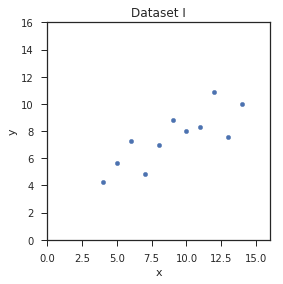

In [9]:
# In practice I played around with the parameters until I got a reasonably pleasing plot.
group1.plot.scatter(x='x', y='y',
                    figsize=(4,4), 
                    title='Dataset I', 
                    xlim=(0,16), ylim=(0,16) )


Now we know how to extract the data from our DataFrame, and what plot parameters give a reasonable view of the data, we can generate a plot for each dataset in turn. Here I'm using a list of the dataset names as the iterator with the iterator body being a simple `plot.scatter()` call.

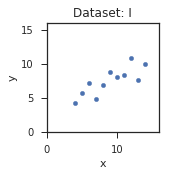

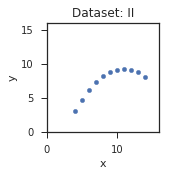

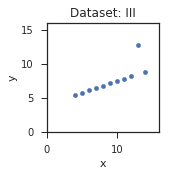

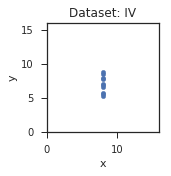

In [10]:
# Loop through the group labels, put that group's x and y values 
# into a scatter plot, and make them small enough to see all 
# four datasets at the same time.
for i in ['I','II','III','IV']:
    aq_df[i].plot.scatter(x='x', y='y', title=('Dataset: '+ i), 
                          figsize=(2,2), xlim=(0,16), ylim=(0,16))

Now we can finally see how different datasets I, II, III and IV actually are, each with its own story to tell, but not stories we would have been alerted to if we had rushed headlong into the analysis using the summary statistics alone.

## Summary

Anscombe's Quartet, though only a small dataset, offers a salutary lesson. The summary statistics for the _x_ and _y_ values across each group may be the same, and a quick look at the values in the data tables makes it hard to picture with any degree of certainity, but when visualised as a whole, each group of data clearly tells a different story.

Anscombe concluded his paper as follows:

> Graphical output such as described above is readily available to anyone who does his own programming. I myself habitually generate such plots at an APL terminal, and have come to appreciate their importance. A skilled Fortran or PL/1 programmer, with an organized library of subroutines, can do the same (on a larger scale). 

> Unfortunately, most persons who have recourse to a computer for statistical analysis of data are not much interested either in computer programming or in statistical method, being primarily concerned with their own proper business. Hence the common use of library programs and various statistical packages. Most of these originated in the pre-visual era. The user is not showered with graphical displays. He can get them only with trouble, cunning and a fighting spirit. It's time that was changed.

Computational techniques have moved on somewhat since 1973, of course, and times have indeed changed. Graphical displays are everywhere, and libraries such as matplotlib, ggplot, and seaborn mean that we are now in a position to 'write' very powerful expressions that can generate statistical graphics for us, directly from a cleaned and prepared dataset, using just a few well-chosen phrases. But getting the data into the right shape may still require significant amounts of *trouble, cunning and a fighting spirit*.

This Notebook should be a valuable reminder that one of the first things you should do with a dataset is visualise it - then remember to check that any subsequent analysis makes sense for a dataset with that shape.

May the visualisations begin ...

## What next?
If you are working through this Notebook as part of an inline exercise, return to the module materials now. 

If you are working through this set of Notebooks as a whole, move on to `05.2 Getting started with maps - folium`. 